<a href="https://colab.research.google.com/github/Douglasdcs/featureSelection/blob/main/TF_Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


In [ ]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=595c78f53987db1871b09a4e39807a630f923de671bb569f266d605c35608860
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


# Carregando dataframe


# Nova seção

In [ ]:
import arff
import pandas as pd

# Abre e lê o arquivo
with open('long-method.arff') as f:
    dataset = arff.load(f)

# DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# print(df.head())
# print(df.shape)  # (708, 83) - 708 instâncias x 82 métricas
# print(df.iloc[:, 0].tolist())

# Substitui true/false por 1/0
df['is_long_method'] = df['is_long_method'].map({'FALSE': 0, 'TRUE': 1})
# print(df.iloc[:, -1].tolist())

# # valores nulos
# nulos_por_coluna = df.isnull().sum()
# # print(df.isnull().sum())
# print("Colunas com valores nulos:", (nulos_por_coluna > 0).sum())
# print("Soma de nulos por coluna:", nulos_por_coluna.sum())
# print("\nColunas com mais valores nulos:")
# print(nulos_por_coluna[nulos_por_coluna > 0].sort_values(ascending=False).head(10))
# # linhas nulas
# linhas_nulas = df[df.isnull().any(axis=1)].index
# print(linhas_nulas.tolist())

# print(df.isnull().sum())

df.fillna(0, inplace=True)

In [ ]:
# nulos?
# for idx in df[df.isnull().any(axis=1)].index:
#     print(f"\n ~~~~~~~~ Linha {idx}:")
#     print(df.loc[idx].to_string())


# Análise do df

In [ ]:
# Analisando
print(df['is_long_method'].value_counts())

is_long_method
0    568
1    140
Name: count, dtype: int64


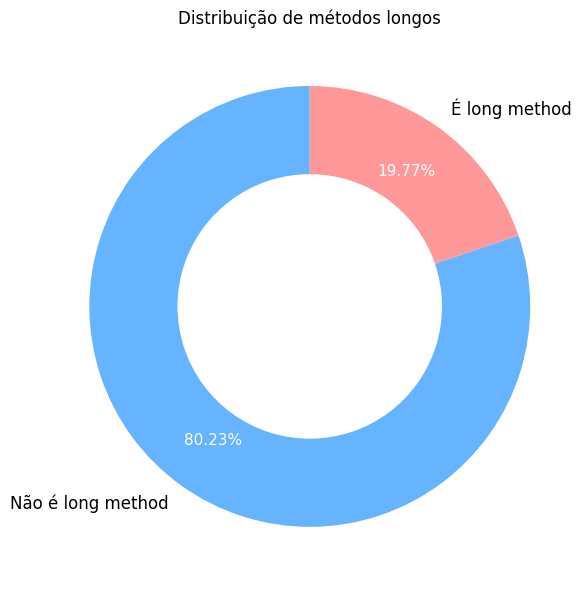

In [ ]:
import matplotlib.pyplot as plt

contagem = df['is_long_method'].value_counts().sort_index()
labels = ['Não é long method', 'É long method']
colors = ['#66b3ff', '#ff9999']

# Gráfico de rosca
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    contagem,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4},
    pctdistance=0.75
)

# Estilização
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_color('white')

plt.title('Distribuição de métodos longos')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
print(df.describe())

       NOP_method   CC_method  ATFD_method  FDP_method   CM_method  \
count  708.000000  708.000000   708.000000  708.000000  708.000000   
mean     1.858757    0.590395     4.266949    1.247175    0.724576   
std      2.577203    1.566632     8.631752    2.108696    1.871128   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.000000    0.000000    0.000000   
50%      1.000000    0.000000     0.000000    0.000000    0.000000   
75%      2.000000    1.000000     5.000000    2.000000    1.000000   
max     29.000000   22.000000    83.000000   14.000000   22.000000   

       MAXNESTING_method   LOC_method  CYCLO_method  NMCS_method  NOLV_method  \
count         708.000000   708.000000    708.000000   708.000000   708.000000   
mean            2.730226    59.155367     10.453390     0.152542     8.040960   
std             2.352125   105.032216     20.602916     0.783065    14.118102   
min             1.000000     1.000000      1.

# ERR Separação do dataset

- Stratify=df['is_long_method'] para manter o balanceamento da variável alvo nas duas divisões (útil para classificação)
- random_state=42 garante reprodutibilidade


In [ ]:
from sklearn.model_selection import train_test_split

# Divide o DataFrame inteiro randon
df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42, stratify=df['is_long_method'])


In [ ]:
# Separar features e target no treino
X_treino = df_treino.drop('is_long_method', axis=1)
y_treino = df_treino['is_long_method']

# Separar features e target no teste
X_teste = df_teste.drop('is_long_method', axis=1)
y_teste = df_teste['is_long_method']



In [ ]:
X_treino

,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,NOLV_method,...,number_not_abstract_not_final_methods,number_static_methods,number_final_static_methods,number_final_not_static_methods,number_not_final_static_methods,number_not_final_not_static_methods,number_standard_design_methods,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,isStatic_method
89,2.0,1.0,6.0,1.0,1.0,5.0,23.0,5.0,0.0,4.0,...,18.0,0.0,0.0,0.0,0.0,18.0,9.0,0.0,3.0,0.0
648,0.0,0.0,4.0,2.0,0.0,2.0,20.0,7.0,0.0,0.0,...,17.0,1.0,0.0,0.0,1.0,16.0,14.0,0.0,1.0,0.0
500,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
370,0.0,0.0,0.0,0.0,0.0,2.0,18.0,3.0,0.0,1.0,...,3.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0
57,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,379.0,1.0,0.0,112.0,1.0,378.0,477.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4.0,0.0,19.0,5.0,0.0,7.0,106.0,19.0,0.0,14.0,...,8.0,8.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,1.0
430,2.0,0.0,9.0,3.0,0.0,2.0,56.0,7.0,0.0,5.0,...,25.0,0.0,0.0,0.0,0.0,25.0,24.0,0.0,1.0,0.0
449,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0
119,2.0,1.0,2.0,2.0,1.0,7.0,101.0,27.0,0.0,12.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_treino

,is_long_method
89,0
648,0
500,0
370,0
57,0
...,...
505,1
430,0
449,0
119,1


# Análise da separação

In [ ]:
print("Proporção no treino (%):")
print(y_treino.value_counts(normalize=True) * 100)

print("\nProporção no teste (%):")
print(y_teste.value_counts(normalize=True) * 100)

Proporção no treino (%):
is_long_method
0    80.20202
1    19.79798
Name: proportion, dtype: float64

Proporção no teste (%):
is_long_method
0    80.28169
1    19.71831
Name: proportion, dtype: float64


# Normalização dos dados de treinamento

Etapa de pré-processamento:
Normalização dos dados de treinamento via método Min-Max.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializa o scaler
scaler = MinMaxScaler()

# Ajusta o scaler com os dados de treino e transforma
X_treino_normalizado = scaler.fit_transform(X_treino)

# Usa o mesmo scaler para transformar os dados de teste (sem re-ajustar!)
X_teste_normalizado = scaler.transform(X_teste)

# ERR Validação cruzada

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, precision_score, f1_score

import pandas as pd


# ⏱️ Estratégia de validação cruzada com 10 folds estratificados
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 🎯 Métricas que queremos medir
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# 📊 Modelos que você quer testar
modelos = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='rbf', probability=True),
    'Árvore de Decisão': DecisionTreeClassifier()
}

# 🎛️ Quantidade de features a selecionar (ajustável!)
num_features = 20

# 📦 Resultados
resultados = {}

for nome, modelo in modelos.items():
    print(f'\n🔍 Avaliando modelo: {nome}')

    # Monta o pipeline com seleção + classificação
    pipeline = Pipeline([
        ('selecao', SelectKBest(score_func=f_classif, k=num_features)),
        ('classificador', modelo)
    ])

    # Validação cruzada com várias métricas
    scores = cross_validate(
        pipeline,
        X_treino_normalizado,
        y_treino,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    # Armazena a média de cada métrica
    resultados[nome] = {
        m: f'{scores["test_" + m].mean():.4f}' for m in scoring
    }

# Mostra os resultados em uma tabela
df_resultados = pd.DataFrame(resultados).T
print('\n📋 Resultado final (médias da validação cruzada):')
print(df_resultados)


🔍 Avaliando modelo: KNN

🔍 Avaliando modelo: SVM

🔍 Avaliando modelo: Árvore de Decisão

📋 Resultado final (médias da validação cruzada):
                  accuracy precision      f1 roc_auc
KNN                 0.9494    0.8633  0.8735  0.9706
SVM                 0.9597    0.8551  0.9066  0.9825
Árvore de Decisão   0.9334    0.8503  0.8256  0.8857


## Seleção de features automaticamente, e não setando como 20

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import clone

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import pandas as pd

# 🔧 Modelos a serem avaliados
modelos = {
    'KNN': KNeighborsClassifier(),
    'SVM (linear)': SVC(kernel='linear', probability=True),
    'Árvore de Decisão': DecisionTreeClassifier()
}

# 🎯 Validação cruzada externa (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 🧾 Resultados finais
resultados = {}

# Avaliar cada modelo com seleção de features interna
for nome, modelo in modelos.items():
    print(f'\n🔍 Avaliando modelo: {nome}')

    # Armazenar métricas
    accs, precs, f1s, aucs, num_feats = [], [], [], [], []

    for train_idx, val_idx in cv.split(X_treino_normalizado, y_treino):
        X_train, X_val = X_treino_normalizado[train_idx], X_treino_normalizado[val_idx]
        y_train, y_val = y_treino.iloc[train_idx], y_treino.iloc[val_idx]

        # Seleção de atributos
        if nome == 'KNN':
            selector = SelectKBest(score_func=f_classif, k=20)
        else:
            selector = RFECV(estimator=clone(modelo), cv=5, scoring='accuracy', step=1)

        X_train_sel = selector.fit_transform(X_train, y_train)
        X_val_sel = selector.transform(X_val)

        # Treinar modelo
        modelo_clonado = clone(modelo)
        modelo_clonado.fit(X_train_sel, y_train)
        y_pred = modelo_clonado.predict(X_val_sel)

        # Scores de probabilidade
        if hasattr(modelo_clonado, 'predict_proba'):
            y_scores = modelo_clonado.predict_proba(X_val_sel)[:, 1]
        else:
            y_scores = modelo_clonado.decision_function(X_val_sel)

        # Avaliar
        accs.append(accuracy_score(y_val, y_pred))
        precs.append(precision_score(y_val, y_pred))
        f1s.append(f1_score(y_val, y_pred))
        aucs.append(roc_auc_score(y_val, y_scores))
        num_feats.append(X_train_sel.shape[1])

    # Armazenar resultado médio
    resultados[nome] = {
        'Acurácia média': f'{pd.Series(accs).mean():.4f}',
        'Precisão média': f'{pd.Series(precs).mean():.4f}',
        'F1-Score': f'{pd.Series(f1s).mean():.4f}',
        'AUC-ROC': f'{pd.Series(aucs).mean():.4f}',
        'Nº médio de features': f'{pd.Series(num_feats).mean():.0f}'
    }

# 🧾 Exibir resultados em tabela
df_resultados = pd.DataFrame(resultados).T
print('\n📋 Resultados finais com seleção automática de atributos:')
print(df_resultados)


🔍 Avaliando modelo: KNN

🔍 Avaliando modelo: SVM (linear)

🔍 Avaliando modelo: Árvore de Decisão

📋 Resultados finais com seleção automática de atributos:
                  Acurácia média Precisão média F1-Score AUC-ROC  \
KNN                       0.9494         0.8633   0.8735  0.9706   
SVM (linear)              0.9595         0.8830   0.8979  0.9819   
Árvore de Decisão         0.9192         0.8124   0.7892  0.8640   

                  Nº médio de features  
KNN                                 20  
SVM (linear)                        19  
Árvore de Decisão                   32  


In [ ]:
print("Distribuição da variável alvo no treino:")
print(y_treino.value_counts())
print("\nProporção (%):")
print(y_treino.value_counts(normalize=True) * 100)

Distribuição da variável alvo no treino:
is_long_method
0    397
1     98
Name: count, dtype: int64

Proporção (%):
is_long_method
0    80.20202
1    19.79798
Name: proportion, dtype: float64


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define grid de parâmetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Validação cruzada estratificada (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearch com SVC
grid_search = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

# Treina com os dados de treino normalizados
grid_search.fit(X_treino_normalizado, y_treino)

# Resultados
print("🔧 Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print(f"\n🏆 Melhor F1-score na validação cruzada: {grid_search.best_score_:.4f}")

🔧 Melhores hiperparâmetros encontrados:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

🏆 Melhor F1-score na validação cruzada: 0.8981


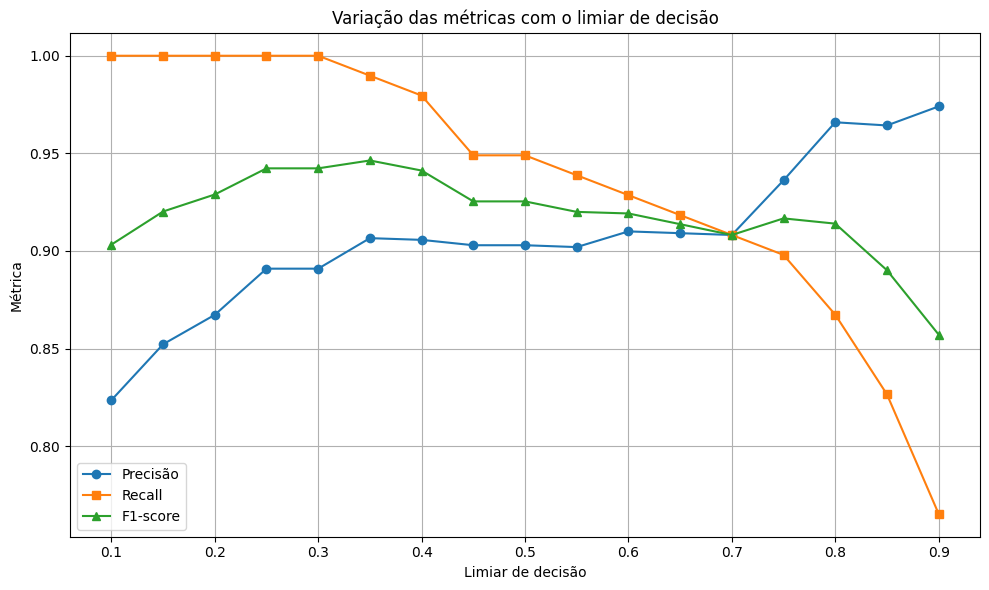

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# ⚙️ Obter as probabilidades da classe positiva com o melhor modelo
y_scores = grid_search.best_estimator_.predict_proba(X_treino_normalizado)[:, 1]

# Inicializar listas para os resultados
limiares = np.arange(0.1, 0.91, 0.05)
precisoes, recalls, f1s = [], [], []

for limiar in limiares:
    y_pred = (y_scores >= limiar).astype(int)
    precisoes.append(precision_score(y_treino, y_pred))
    recalls.append(recall_score(y_treino, y_pred))
    f1s.append(f1_score(y_treino, y_pred))

# 📊 Plotar gráfico
plt.figure(figsize=(10,6))
plt.plot(limiares, precisoes, label='Precisão', marker='o')
plt.plot(limiares, recalls, label='Recall', marker='s')
plt.plot(limiares, f1s, label='F1-score', marker='^')
plt.xlabel('Limiar de decisão')
plt.ylabel('Métrica')
plt.title('Variação das métricas com o limiar de decisão')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Probabilidades previstas pelo modelo treinado (classe 1)
y_scores = grid_search.best_estimator_.predict_proba(X_treino_normalizado)[:, 1]

# Lista de limiares que serão testados
limiares = np.arange(0.1, 0.91, 0.05)
resultados = []

# Calcula as métricas para cada limiar
for limiar in limiares:
    y_pred = (y_scores >= limiar).astype(int)

    prec = precision_score(y_treino, y_pred)
    rec = recall_score(y_treino, y_pred)
    f1 = f1_score(y_treino, y_pred)

    resultados.append({
        'Limiar': round(limiar, 2),
        'Precisão': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4)
    })

# Cria um DataFrame com os resultados
df_limiares = pd.DataFrame(resultados)

# Ordena por F1-Score decrescente, se quiser
df_limiares = df_limiares.sort_values(by='F1-Score', ascending=False)

# Exibe a tabela
print('\n📋 Desempenho por limiar de decisão:\n')
print(df_limiares.to_string(index=False))


📋 Desempenho por limiar de decisão:

 Limiar  Precisão  Recall  F1-Score
   0.35    0.9065  0.9898    0.9463
   0.25    0.8909  1.0000    0.9423
   0.30    0.8909  1.0000    0.9423
   0.40    0.9057  0.9796    0.9412
   0.20    0.8673  1.0000    0.9289
   0.50    0.9029  0.9490    0.9254
   0.45    0.9029  0.9490    0.9254
   0.15    0.8522  1.0000    0.9202
   0.55    0.9020  0.9388    0.9200
   0.60    0.9100  0.9286    0.9192
   0.75    0.9362  0.8980    0.9167
   0.80    0.9659  0.8673    0.9140
   0.65    0.9091  0.9184    0.9137
   0.70    0.9082  0.9082    0.9082
   0.10    0.8235  1.0000    0.9032
   0.85    0.9643  0.8265    0.8901
   0.90    0.9740  0.7653    0.8571


# ERR LIMIAR CORRIGIDO


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, precision_score, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np

# ⏱️ Validação cruzada com 10 folds estratificados
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 🔧 Limiar de decisão desejado
limiar_personalizado = 0.35

# 🎯 Métricas personalizadas com limiar aplicado às probabilidades
def f1_limiar(y_true, y_proba):
    y_pred = (y_proba[:, 1] >= limiar_personalizado).astype(int)
    return f1_score(y_true, y_pred)

def precision_limiar(y_true, y_proba):
    y_pred = (y_proba[:, 1] >= limiar_personalizado).astype(int)
    return precision_score(y_true, y_pred)

from sklearn.metrics import make_scorer

precision_scorer = make_scorer(precision_limiar, needs_proba=True)
f1_scorer = make_scorer(f1_limiar, needs_proba=True)

scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': precision_scorer,  # ✅ agora sim usando make_scorer
    'f1': f1_scorer                 # ✅ idem
}

# 🛠️ Scorers customizados usando make_scorer corretamente
precision_scorer = make_scorer(precision_limiar, needs_proba=True)
f1_scorer = make_scorer(f1_limiar, needs_proba=True)

# 🎯 Scoring com métricas tradicionais e customizadas
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': precision_scorer,
    'f1': f1_scorer
}

# 📊 Modelos a serem testados
modelos = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='rbf', probability=True),
    'Árvore de Decisão': DecisionTreeClassifier()
}

# 🎛️ Número de features a manter
num_features = 20

# 📦 Resultados
resultados = {}

for nome, modelo in modelos.items():
    print(f'\n🔍 Avaliando modelo: {nome}')

    # Pipeline: seleção de atributos + classificador
    pipeline = Pipeline([
        ('selecao', SelectKBest(score_func=f_classif, k=num_features)),
        ('classificador', modelo)
    ])

    # Validação cruzada com múltiplas métricas
    scores = cross_validate(
        pipeline,
        X_treino_normalizado,
        y_treino,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    # Armazena resultados médios de cada métrica
    resultados[nome] = {
        m: f'{np.mean(scores["test_" + m]):.4f}' for m in scoring
    }

# 📋 Resultado final em DataFrame
df_resultados = pd.DataFrame(resultados).T
print('\n📋 Resultado final com limiar de decisão =', limiar_personalizado)
print(df_resultados)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

# Pipeline: seleção de features + SVM com probabilidade
pipeline = Pipeline([
    ('selecao', SelectKBest(score_func=f_classif, k=20)),
    ('modelo', SVC(kernel='rbf', probability=True))
])

# Obtem as probabilidades previstas em validação cruzada
y_scores = cross_val_predict(
    pipeline,
    X_treino_normalizado,
    y_treino,
    cv=10,
    method='predict_proba'
)

# Aplica o limiar customizado
limiar = 0.35
y_pred = (y_scores[:, 1] >= limiar).astype(int)

# Calcula métricas
prec = precision_score(y_treino, y_pred)
rec = recall_score(y_treino, y_pred)
f1 = f1_score(y_treino, y_pred)

print(f'🧪 Resultado com limiar {limiar}:')
print(f'Precisão: {prec:.4f}')
print(f'Recall:   {rec:.4f}')
print(f'F1-score: {f1:.4f}')

🧪 Resultado com limiar 0.35:
Precisão: 0.8636
Recall:   0.9694
F1-score: 0.9135


# SEM SELEÇÃO DE FEATURES

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Lista de modelos
modelos = {
    'KNN': KNeighborsClassifier(),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Avaliação de cada modelo
for nome, modelo in modelos.items():
    print(f'\n🔍 Avaliando: {nome}')

    # Treinamento
    modelo.fit(X_treino_normalizado, y_treino)

    # Previsões
    y_pred = modelo.predict(X_teste_normalizado)

    # Métricas
    acuracia = accuracy_score(y_teste, y_pred)
    precisao = precision_score(y_teste, y_pred)
    recall = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)

    # Resultado
    print(f'Acurácia:  {acuracia:.4f}')
    print(f'Precisão:  {precisao:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1-Score:  {f1:.4f}')



🔍 Avaliando: KNN
Acurácia:  0.8873
Precisão:  0.7368
Recall:    0.6667
F1-Score:  0.7000

🔍 Avaliando: Árvore de Decisão
Acurácia:  0.9249
Precisão:  0.7826
Recall:    0.8571
F1-Score:  0.8182

🔍 Avaliando: SVM
Acurácia:  0.9577
Precisão:  0.8367
Recall:    0.9762
F1-Score:  0.9011


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv=5)
grid.fit(X_treino_normalizado, y_treino)
print("Melhor K:", grid.best_params_)



Melhor K: {'n_neighbors': 3}


## KNN SEM SELEÇÃO DE FEATURES

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Resultados acumulados
resultados = []

for seed in range(10):
    # Split
    df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['is_long_method'])

    # Separar features e alvo
    X_treino = df_treino.drop('is_long_method', axis=1)
    y_treino = df_treino['is_long_method']
    X_teste = df_teste.drop('is_long_method', axis=1)
    y_teste = df_teste['is_long_method']

    # Normalização
    scaler = MinMaxScaler()
    X_treino_norm = scaler.fit_transform(X_treino)
    X_teste_norm = scaler.transform(X_teste)

    # Modelo
    modelo = KNeighborsClassifier(n_neighbors=3, weights='distance')
    modelo.fit(X_treino_norm, y_treino)
    y_pred = modelo.predict(X_teste_norm)

    # Métricas
    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)

    resultados.append([acc, prec, rec, f1])

# Médias e desvios
resultados = np.array(resultados)
métricas = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']

print('\n📊 Resultados médios em 10 splits aleatórios:')
for i, metrica in enumerate(métricas):
    print(f'{metrica}: {resultados[:, i].mean():.4f} ± {resultados[:, i].std():.4f}')



📊 Resultados médios em 10 splits aleatórios:
Acurácia: 0.9169 ± 0.0103
Precisão: 0.8603 ± 0.0490
Recall: 0.6952 ± 0.0508
F1-Score: 0.7669 ± 0.0315


## Para todos algoritmos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Dicionário de modelos
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance'),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=5, min_samples_leaf=3, class_weight='balanced', criterion='entropy'),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    'GBT': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Resultados finais: {modelo: [[acurácia, precisão, recall, f1], ...]}
resultados_finais = {nome: [] for nome in modelos}

# Loop para 10 splits
for seed in range(10):
    df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['is_long_method'])

    X_treino = df_treino.drop('is_long_method', axis=1)
    y_treino = df_treino['is_long_method']
    X_teste = df_teste.drop('is_long_method', axis=1)
    y_teste = df_teste['is_long_method']

    scaler = MinMaxScaler()
    X_treino_norm = scaler.fit_transform(X_treino)
    X_teste_norm = scaler.transform(X_teste)

    # Avalia cada modelo
    for nome, modelo in modelos.items():
        modelo.fit(X_treino_norm, y_treino)
        y_pred = modelo.predict(X_teste_norm)

        acc = accuracy_score(y_teste, y_pred)
        prec = precision_score(y_teste, y_pred)
        rec = recall_score(y_teste, y_pred)
        f1 = f1_score(y_teste, y_pred)

        resultados_finais[nome].append([acc, prec, rec, f1])

# Mostrar resultados médios
print('\n📊 MÉDIAS FINAIS (10 EXECUÇÕES)\n')
for nome, valores in resultados_finais.items():
    valores = np.array(valores)
    medias = valores.mean(axis=0)
    desvios = valores.std(axis=0)
    print(f'🔹 {nome}')
    print(f'  Acurácia:  {medias[0]:.4f} ± {desvios[0]:.4f}')
    print(f'  Precisão:  {medias[1]:.4f} ± {desvios[1]:.4f}')
    print(f'  Recall:    {medias[2]:.4f} ± {desvios[2]:.4f}')
    print(f'  F1-Score:  {medias[3]:.4f} ± {desvios[3]:.4f}\n')



📊 MÉDIAS FINAIS (10 EXECUÇÕES)

🔹 KNN
  Acurácia:  0.9169 ± 0.0103
  Precisão:  0.8603 ± 0.0490
  Recall:    0.6952 ± 0.0508
  F1-Score:  0.7669 ± 0.0315

🔹 Árvore de Decisão
  Acurácia:  0.9455 ± 0.0146
  Precisão:  0.8432 ± 0.0540
  Recall:    0.8952 ± 0.0490
  F1-Score:  0.8666 ± 0.0336

🔹 Random Forest
  Acurácia:  0.9535 ± 0.0074
  Precisão:  0.8491 ± 0.0358
  Recall:    0.9333 ± 0.0381
  F1-Score:  0.8880 ± 0.0162

🔹 GBT
  Acurácia:  0.9516 ± 0.0096
  Precisão:  0.8403 ± 0.0344
  Recall:    0.9357 ± 0.0554
  F1-Score:  0.8838 ± 0.0242

🔹 SVM
  Acurácia:  0.9446 ± 0.0109
  Precisão:  0.8339 ± 0.0286
  Recall:    0.9000 ± 0.0541
  F1-Score:  0.8645 ± 0.0281



# COM SELEÇÃO DE FEATURES

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# ---------- 1. Prepara treino/teste ----------
df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42, stratify=df['is_long_method'])

X_treino_full = df_treino.drop('is_long_method', axis=1)
y_treino = df_treino['is_long_method']

X_teste_full = df_teste.drop('is_long_method', axis=1)
y_teste = df_teste['is_long_method']

# Normalização Min-Max
scaler = MinMaxScaler()
X_treino_norm = pd.DataFrame(scaler.fit_transform(X_treino_full), columns=X_treino_full.columns)
X_teste_norm = pd.DataFrame(scaler.transform(X_teste_full), columns=X_teste_full.columns)

# ---------- 2. Forward Selection ----------
features_disponiveis = list(X_treino_norm.columns)
features_selecionadas = []
resultados_fs = []

print("\n▶️ Iniciando Forward Selection para Random Forest...\n")

# LIMITA A SELEÇÃO AO TOP-20
while len(features_selecionadas) < 20:  # <<-- Top 20 apenas
    melhor_f1 = -1
    melhor_feature = None

    for f in features_disponiveis:
        if f in features_selecionadas:
            continue
        temp_features = features_selecionadas + [f]
        X_temp = X_treino_norm[temp_features]

        modelo = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        f1 = cross_val_score(modelo, X_temp, y_treino, cv=kfold, scoring='f1', n_jobs=-1).mean()

        if f1 > melhor_f1:
            melhor_f1 = f1
            melhor_feature = f

    features_selecionadas.append(melhor_feature)
    resultados_fs.append((melhor_feature, melhor_f1))
    print(f"✔️ Adicionada: {melhor_feature:30s} | F1: {melhor_f1:.4f}")

# ---------- 3. Treinamento final com top-20 features ----------
print("\n✅ Treinando modelo final com as top-20 features selecionadas...\n")

X_treino_final = X_treino_norm[features_selecionadas]
X_teste_final = X_teste_norm[features_selecionadas]

modelo_final = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
modelo_final.fit(X_treino_final, y_treino)
y_pred = modelo_final.predict(X_teste_final)

# ---------- 4. Avaliação final ----------
acc = accuracy_score(y_teste, y_pred)
prec = precision_score(y_teste, y_pred)
rec = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)

print("📊 Avaliação Final no Conjunto de Teste (com top-20 features):")
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

# ---------- [Comentado] Modelo com TODAS as features selecionadas ----------
# print("\n📎 (Comentado) Treinando com todas as features selecionadas...\n")
# X_treino_all = X_treino_norm[features_selecionadas]
# X_teste_all = X_teste_norm[features_selecionadas]
# modelo_todos = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
# modelo_todos.fit(X_treino_all, y_treino)
# y_pred_all = modelo_todos.predict(X_teste_all)
# print(f"F1 (todas): {f1_score(y_teste, y_pred_all):.4f}")



▶️ Iniciando Forward Selection para Random Forest...



KeyboardInterrupt: 

## Utilizando o número ótimo de features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# ---------- 1. Prepara treino/teste ----------
df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42, stratify=df['is_long_method'])

X_treino_full = df_treino.drop('is_long_method', axis=1)
y_treino = df_treino['is_long_method']

X_teste_full = df_teste.drop('is_long_method', axis=1)
y_teste = df_teste['is_long_method']

# Normalização Min-Max
scaler = MinMaxScaler()
X_treino_norm = pd.DataFrame(scaler.fit_transform(X_treino_full), columns=X_treino_full.columns)
X_teste_norm = pd.DataFrame(scaler.transform(X_teste_full), columns=X_teste_full.columns)

# ---------- 2. Forward Selection com registro do F1 médio ----------
features_disponiveis = list(X_treino_norm.columns)
features_selecionadas = []
f1_por_num_features = []  # Guarda o melhor F1 a cada tamanho do conjunto
melhor_f1_global = -1
melhor_num_features = 0

print("\n▶️ Iniciando Forward Selection para Random Forest...\n")

while len(features_selecionadas) < len(features_disponiveis):
    melhor_f1 = -1
    melhor_feature = None

    for f in features_disponiveis:
        if f in features_selecionadas:
            continue
        temp_features = features_selecionadas + [f]
        X_temp = X_treino_norm[temp_features]

        modelo = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        f1 = cross_val_score(modelo, X_temp, y_treino, cv=kfold, scoring='f1', n_jobs=-1).mean()

        if f1 > melhor_f1:
            melhor_f1 = f1
            melhor_feature = f

    features_selecionadas.append(melhor_feature)
    f1_por_num_features.append(melhor_f1)

    print(f"✔️ {len(features_selecionadas):2d} features | Adicionada: {melhor_feature:30s} | F1: {melhor_f1:.4f}")

    # Atualiza o melhor ponto global
    if melhor_f1 > melhor_f1_global:
        melhor_f1_global = melhor_f1
        melhor_num_features = len(features_selecionadas)

# ---------- 3. Identifica subconjunto ótimo de features ----------
top_features_otimo = features_selecionadas[:melhor_num_features]
print(f"\n🏆 Melhor desempenho com {melhor_num_features} features | F1 médio (CV): {melhor_f1_global:.4f}")
print("📌 Features selecionadas:")
print(top_features_otimo)

# ---------- 4. Treinamento e avaliação final no conjunto de teste ----------
X_treino_final = X_treino_norm[top_features_otimo]
X_teste_final = X_teste_norm[top_features_otimo]

modelo_final = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
modelo_final.fit(X_treino_final, y_treino)
y_pred = modelo_final.predict(X_teste_final)

acc = accuracy_score(y_teste, y_pred)
prec = precision_score(y_teste, y_pred)
rec = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)

print("\n📊 Avaliação Final no Conjunto de Teste (com subconjunto ótimo de features):")
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

# ---------- [Opcional] Plotar curva F1 vs nº de features ----------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(f1_por_num_features)+1), f1_por_num_features, marker='o')
plt.axvline(melhor_num_features, color='red', linestyle='--', label=f'Melhor F1: {melhor_f1_global:.4f}')
plt.title('F1-score médio (validação cruzada) vs Nº de Features (Forward Selection)')
plt.xlabel('Número de features selecionadas')
plt.ylabel('F1-score médio (10-fold CV)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## SVM com ponto ótimo

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. Prepara treino/teste ----------
df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42, stratify=df['is_long_method'])

X_treino_full = df_treino.drop('is_long_method', axis=1)
y_treino = df_treino['is_long_method']

X_teste_full = df_teste.drop('is_long_method', axis=1)
y_teste = df_teste['is_long_method']

# Normalização Min-Max
scaler = MinMaxScaler()
X_treino_norm = pd.DataFrame(scaler.fit_transform(X_treino_full), columns=X_treino_full.columns)
X_teste_norm = pd.DataFrame(scaler.transform(X_teste_full), columns=X_teste_full.columns)

# ---------- 2. Forward Selection com SVM ----------
features_disponiveis = list(X_treino_norm.columns)
features_selecionadas = []
f1_por_num_features = []
melhor_f1_global = -1
melhor_num_features = 0

print("\n▶️ Iniciando Forward Selection para SVM...\n")

while len(features_selecionadas) < len(features_disponiveis):
    melhor_f1 = -1
    melhor_feature = None

    for f in features_disponiveis:
        if f in features_selecionadas:
            continue
        temp_features = features_selecionadas + [f]
        X_temp = X_treino_norm[temp_features]

        modelo = SVC(kernel='rbf', class_weight='balanced', random_state=42)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        f1 = cross_val_score(modelo, X_temp, y_treino, cv=kfold, scoring='f1', n_jobs=-1).mean()

        if f1 > melhor_f1:
            melhor_f1 = f1
            melhor_feature = f

    features_selecionadas.append(melhor_feature)
    f1_por_num_features.append(melhor_f1)

    print(f"✔️ {len(features_selecionadas):2d} features | Adicionada: {melhor_feature:30s} | F1: {melhor_f1:.4f}")

    # Atualiza ponto ótimo
    if melhor_f1 > melhor_f1_global:
        melhor_f1_global = melhor_f1
        melhor_num_features = len(features_selecionadas)

# ---------- 3. Subconjunto ótimo de features ----------
top_features_otimo = features_selecionadas[:melhor_num_features]
print(f"\n🏆 Melhor desempenho com {melhor_num_features} features | F1 médio (CV): {melhor_f1_global:.4f}")
print("📌 Features selecionadas:")
print(top_features_otimo)

# ---------- 4. Treinamento final com features ótimas ----------
X_treino_final = X_treino_norm[top_features_otimo]
X_teste_final = X_teste_norm[top_features_otimo]

modelo_final = SVC(kernel='rbf', class_weight='balanced', random_state=42)
modelo_final.fit(X_treino_final, y_treino)
y_pred = modelo_final.predict(X_teste_final)

acc = accuracy_score(y_teste, y_pred)
prec = precision_score(y_teste, y_pred)
rec = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)

print("\n📊 Avaliação Final no Conjunto de Teste (com subconjunto ótimo de features):")
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

# ---------- 5. Gráfico F1 vs Nº de Features ----------
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(f1_por_num_features)+1), f1_por_num_features, marker='o', label='F1 médio (CV)')
plt.axvline(melhor_num_features, color='red', linestyle='--', label=f'Melhor F1: {melhor_f1_global:.4f}')
plt.title('F1-score médio (validação cruzada) vs Nº de Features (SVM - Forward Selection)')
plt.xlabel('Número de features selecionadas')
plt.ylabel('F1-score médio (10-fold CV)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##| Tudo junto

In [ ]:
# Célula 1 - Imports, preparo dos dados e definição dos modelos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Supondo que df já esteja carregado no ambiente
# Divisão treino/teste
df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42, stratify=df['is_long_method'])

X_treino_full = df_treino.drop('is_long_method', axis=1)
y_treino = df_treino['is_long_method']

X_teste_full = df_teste.drop('is_long_method', axis=1)
y_teste = df_teste['is_long_method']

# Normalização Min-Max
scaler = MinMaxScaler()
X_treino_norm = pd.DataFrame(scaler.fit_transform(X_treino_full), columns=X_treino_full.columns)
X_teste_norm = pd.DataFrame(scaler.transform(X_teste_full), columns=X_teste_full.columns)

# Definição dos modelos com os parâmetros fornecidos
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance'),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42, max_depth=20, min_samples_split=5, min_samples_leaf=3, class_weight='balanced', criterion='entropy'),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    'GBT': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}


### validação cruzada

In [ ]:
# Célula 2 - Função para forward selection com validação cruzada

def forward_selection_f1(modelo, X, y, max_features=30, cv_splits=10):
    from sklearn.model_selection import StratifiedKFold, cross_val_score

    features_disponiveis = list(X.columns)
    features_selecionadas = []
    f1_por_num_features = []
    melhor_f1_global = -1
    melhor_num_features = 0

    kfold = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    print(f"\n▶️ Forward Selection para {type(modelo).__name__} iniciando...")

    while len(features_selecionadas) < min(max_features, len(features_disponiveis)):
        melhor_f1 = -1
        melhor_feature = None

        for f in features_disponiveis:
            if f in features_selecionadas:
                continue
            temp_features = features_selecionadas + [f]
            X_temp = X[temp_features]

            # cross_val_score retorna array, pegamos a média do F1
            f1 = cross_val_score(modelo, X_temp, y, cv=kfold, scoring='f1', n_jobs=-1).mean()

            if f1 > melhor_f1:
                melhor_f1 = f1
                melhor_feature = f

        features_selecionadas.append(melhor_feature)
        f1_por_num_features.append(melhor_f1)
        print(f"✔️ {len(features_selecionadas):2d} features | Adicionada: {melhor_feature:30s} | F1: {melhor_f1:.4f}")

        if melhor_f1 > melhor_f1_global:
            melhor_f1_global = melhor_f1
            melhor_num_features = len(features_selecionadas)

    return features_selecionadas[:melhor_num_features], melhor_f1_global, f1_por_num_features


### treinar e avaliar todos os modelos


=== Iniciando modelo: KNN ===

▶️ Forward Selection para KNeighborsClassifier iniciando...
✔️  1 features | Adicionada: MAXNESTING_method              | F1: 0.8635
✔️  2 features | Adicionada: number_not_final_static_methods | F1: 0.8925
✔️  3 features | Adicionada: CM_method                      | F1: 0.9057
✔️  4 features | Adicionada: NMCS_method                    | F1: 0.9057
✔️  5 features | Adicionada: MaMCL_method                   | F1: 0.9057
✔️  6 features | Adicionada: MeMCL_method                   | F1: 0.9057
✔️  7 features | Adicionada: isStatic_type                  | F1: 0.9057
✔️  8 features | Adicionada: number_abstract_methods        | F1: 0.9057
✔️  9 features | Adicionada: number_static_methods          | F1: 0.8999
✔️ 10 features | Adicionada: number_package_visibility_methods | F1: 0.8999
✔️ 11 features | Adicionada: CC_method                      | F1: 0.8999
✔️ 12 features | Adicionada: number_final_methods           | F1: 0.8999
✔️ 13 features | Adicionada:

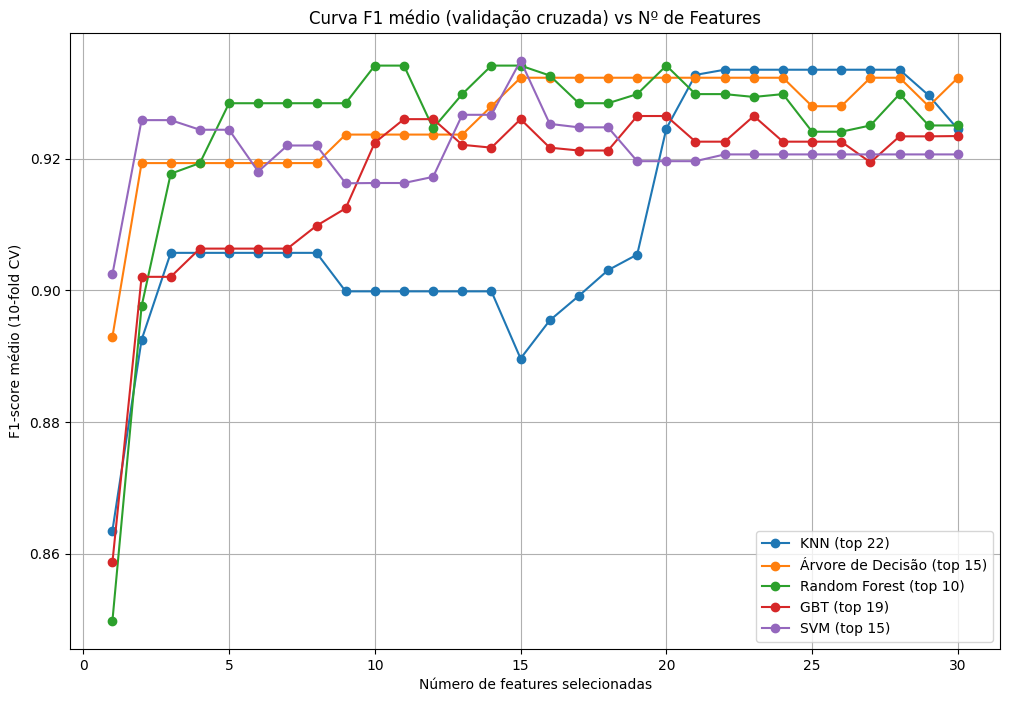

In [ ]:
# Célula 3 - Loop para rodar forward selection, treinar e avaliar todos os modelos

import matplotlib.pyplot as plt

resultados = {}

for nome_modelo, modelo in modelos.items():
    print(f"\n=== Iniciando modelo: {nome_modelo} ===")

    # Forward selection
    top_features, melhor_f1, f1_curve = forward_selection_f1(modelo, X_treino_norm, y_treino, max_features=30, cv_splits=10)

    # Treinamento final com features selecionadas
    X_treino_fs = X_treino_norm[top_features]
    X_teste_fs = X_teste_norm[top_features]

    modelo.fit(X_treino_fs, y_treino)
    y_pred = modelo.predict(X_teste_fs)

    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)

    resultados[nome_modelo] = {
        'features': top_features,
        'num_features': len(top_features),
        'f1_cv_max': melhor_f1,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_test': f1,
        'f1_curve': f1_curve
    }

    print(f"\nModelo {nome_modelo} final:")
    print(f"  Nº de features: {len(top_features)}")
    print(f"  Acurácia:  {acc:.4f}")
    print(f"  Precisão:  {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Plotar as curvas de F1 para todos modelos
plt.figure(figsize=(12, 8))
for nome_modelo, res in resultados.items():
    plt.plot(range(1, len(res['f1_curve']) + 1), res['f1_curve'], marker='o', label=f"{nome_modelo} (top {res['num_features']})")

plt.title('Curva F1 médio (validação cruzada) vs Nº de Features')
plt.xlabel('Número de features selecionadas')
plt.ylabel('F1-score médio (10-fold CV)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Célula 4 - Salvando os resultados em um arquivo .txt

output_path = "resultados_forward_selection.txt"

with open(output_path, "w", encoding="utf-8") as f:
    for nome_modelo, res in resultados.items():
        f.write(f"=== Modelo: {nome_modelo} ===\n")
        f.write(f"Nº de features selecionadas: {res['num_features']}\n")
        f.write(f"Features selecionadas:\n")
        f.write(", ".join(res['features']) + "\n\n")
        f.write(f"F1-score médio (validação cruzada): {res['f1_cv_max']:.4f}\n")
        f.write(f"Avaliação no conjunto de teste:\n")
        f.write(f"  Acurácia:  {res['accuracy']:.4f}\n")
        f.write(f"  Precisão:  {res['precision']:.4f}\n")
        f.write(f"  Recall:    {res['recall']:.4f}\n")
        f.write(f"  F1-Score:  {res['f1_test']:.4f}\n")
        f.write("="*50 + "\n\n")

print(f"✅ Resultados salvos em: {output_path}")


✅ Resultados salvos em: resultados_forward_selection.txt


In [ ]:
# Célula 5 - Leitura e impressão dos resultados salvos

arquivo_resultados = "resultados_forward_selection.txt"

try:
    with open(arquivo_resultados, "r", encoding="utf-8") as f:
        conteudo = f.read()
        print("📄 Resultados carregados com sucesso:\n")
        print(conteudo)
except FileNotFoundError:
    print(f"⚠️ Arquivo '{arquivo_resultados}' não encontrado. Certifique-se de que ele foi gerado antes.")


📄 Resultados carregados com sucesso:

=== Modelo: KNN ===
Nº de features selecionadas: 22
Features selecionadas:
MAXNESTING_method, number_not_final_static_methods, CM_method, NMCS_method, MaMCL_method, MeMCL_method, isStatic_type, number_abstract_methods, number_static_methods, number_package_visibility_methods, CC_method, number_final_methods, number_final_static_methods, number_final_not_static_methods, isStatic_method, NOII_type, NOP_method, NOM_type, LOC_method, NOAV_method, number_public_visibility_methods, number_constructor_DefaultConstructor_methods

F1-score médio (validação cruzada): 0.9335
Avaliação no conjunto de teste:
  Acurácia:  0.9202
  Precisão:  0.8378
  Recall:    0.7381
  F1-Score:  0.7848

=== Modelo: Árvore de Decisão ===
Nº de features selecionadas: 15
Features selecionadas:
LOC_method, CYCLO_method, CC_method, CM_method, MAXNESTING_method, NMCS_method, MaMCL_method, MeMCL_method, number_not_abstract_not_final_methods, NOII_type, num_static_not_final_attributes